In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
input_file = "./data/2024_04_22-25.csv"
df = pd.read_csv(
    input_file,
    #nrows=100,
    names=["time", "x", "y", "z", "temp"],
)

In [3]:
df.head()

,time,x,y,z,temp
0,Normal power on reset,NaN,NaN,NaN,NaN
1,0 : 0 : 0 : 37.64,84.0,-37.0,237.0,25.0
2,0 : 0 : 0 : 37.128,84.0,-37.0,237.0,25.0
3,0 : 0 : 0 : 37.192,84.0,-38.0,237.0,25.0
4,0 : 0 : 0 : 37.256,84.0,-37.0,237.0,25.0


In [4]:
df.isnull().sum()

time    0
x       2
y       2
z       2
temp    2
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

time    0
x       0
y       0
z       0
temp    0
dtype: int64

In [6]:
df.head()

,time,x,y,z,temp
1,0 : 0 : 0 : 37.64,84.0,-37.0,237.0,25.0
2,0 : 0 : 0 : 37.128,84.0,-37.0,237.0,25.0
3,0 : 0 : 0 : 37.192,84.0,-38.0,237.0,25.0
4,0 : 0 : 0 : 37.256,84.0,-37.0,237.0,25.0
5,0 : 0 : 0 : 37.320,84.0,-37.0,237.0,25.0


In [7]:
#df["time"] = pd.to_timedelta(df["time"].apply(lambda x: timedelta(hours=)), unit="days")
df["time"] = pd.to_timedelta(df["time"].str.replace(" ", "").str.replace(":", " days ", 1), unit="days")
#df["time"].str.replace(" ", "").str.replace(":", " days ", 1)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,2476530,0 days 19:56:30.985655,0 days 13:53:56.958992,0 days 00:00:37.102400,0 days 08:11:58,0 days 16:23:20.960000,1 days 07:38:44.944000,2 days 00:01:28.960000
x,2.47653e+06,44.42,12.2851,-288,35,46,62,380
y,2.47653e+06,-8.45582,1.90191,-254,-9,-8,-8,239
z,2.47653e+06,247.199,3.17021,-373,245,248,249,511
temp,2.47653e+06,24.0769,1.00084,22,23,24,25,28


In [9]:
def inG(x, range=2):
    return range*x/512.

df["x_inG"] = inG(df["x"])
df["y_inG"] = inG(df["y"])
df["z_inG"] = inG(df["z"])

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,2476530,0 days 19:56:30.985655,0 days 13:53:56.958992,0 days 00:00:37.102400,0 days 08:11:58,0 days 16:23:20.960000,1 days 07:38:44.944000,2 days 00:01:28.960000
x,2.47653e+06,44.42,12.2851,-288,35,46,62,380
y,2.47653e+06,-8.45582,1.90191,-254,-9,-8,-8,239
z,2.47653e+06,247.199,3.17021,-373,245,248,249,511
temp,2.47653e+06,24.0769,1.00084,22,23,24,25,28
x_inG,2.47653e+06,0.173516,0.0479885,-1.125,0.136719,0.179688,0.242188,1.48438
y_inG,2.47653e+06,-0.0330305,0.00742933,-0.992188,-0.0351562,-0.03125,-0.03125,0.933594
z_inG,2.47653e+06,0.965622,0.0123836,-1.45703,0.957031,0.96875,0.972656,1.99609


In [11]:
df_mini = df[0:500]

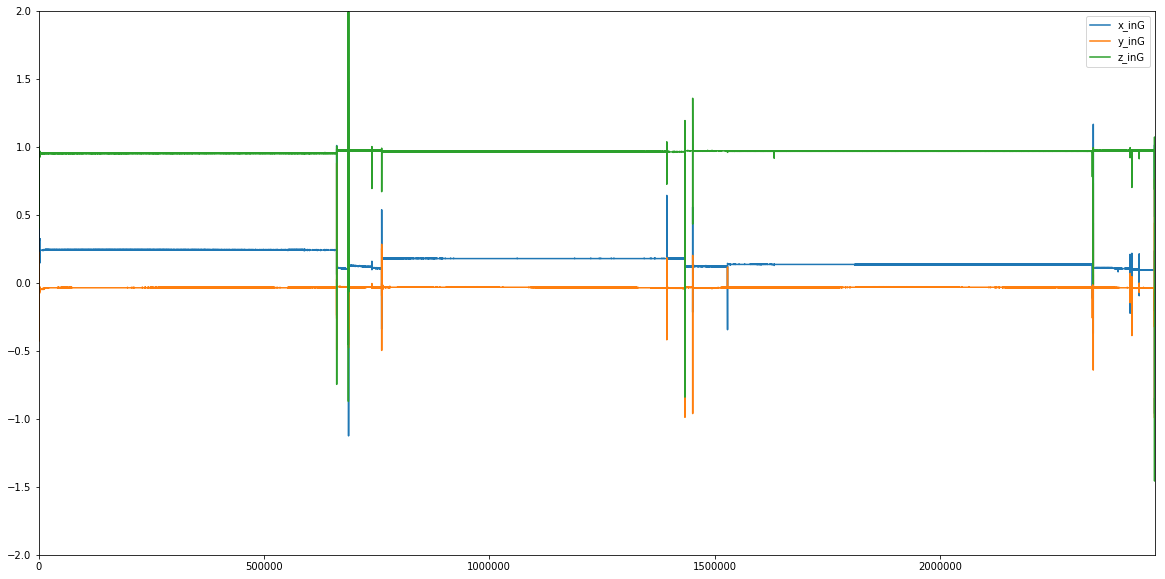

In [12]:
df[["x_inG", "y_inG", "z_inG"]].plot.line(figsize=(20, 10))
plt.ylim(-2, 2)
plt.show()

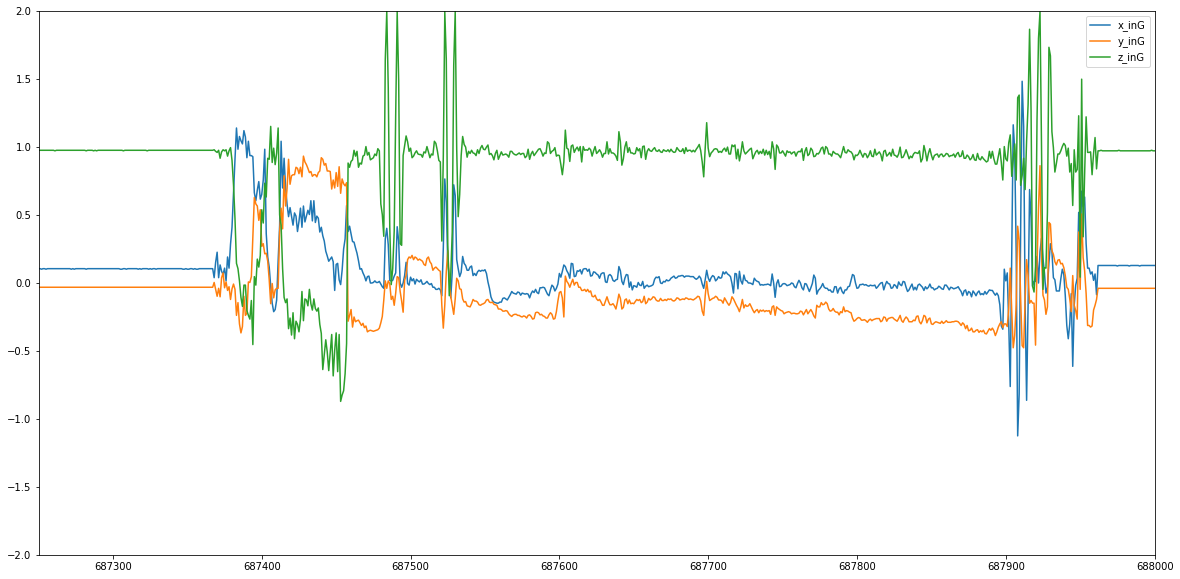

In [13]:
df[["x_inG", "y_inG", "z_inG"]].plot.line(figsize=(20, 10))
plt.ylim(-2, 2)
plt.xlim(687250, 688000)
plt.show()

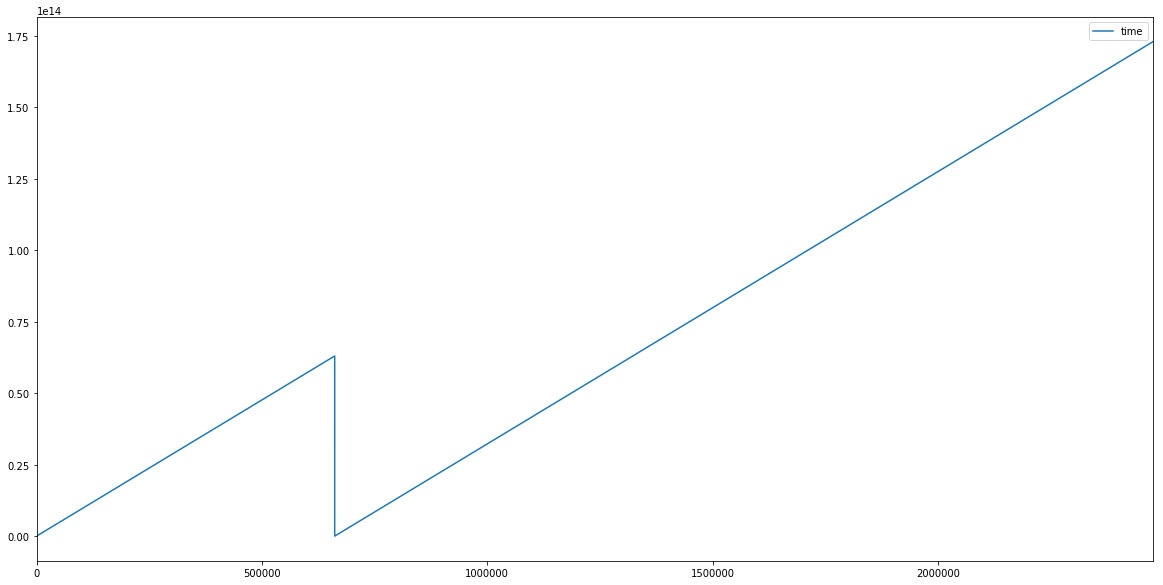

In [26]:
df[["time"]].plot(figsize=(20, 10))